# Задание 5
- Шеверев Сергей Вячеславович
- 22М-05ММ
- Вариант 3

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats


In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Считаем датасет:

In [75]:
df = pd.read_csv('data_big.csv')

In [76]:
len(df.keys())

121

В датасете 120 признаков, один из которых - это порядковый номер записи. Нам нужны наблюдения в первый день и только  качественные признаки. Поэтому отфильтруем ненужные.

In [77]:
df.head()

,Unnamed: 0,X.1,depressed.mood.1,anxiety.1,suspiciousness.1,irritability.1,craving.to.alcohol.1,weakness.1,insomia.1,headache.1,...,combined2.9,HR.9,SBP.9,DBP.9,MBP.9,SV.9,CO.9,SI.9,CI.9,TPR.9
0,1,1,1,1,0,1,1,1,1,0,...,0,68.0,108.0,70.0,83.0,74.0,5.0,40.0,2.7,1321.0
1,2,2,1,1,0,0,1,1,2,1,...,9,63.0,114.0,70.0,85.0,123.0,7.7,60.0,3.8,879.0
2,3,3,1,1,0,0,0,2,1,0,...,0,64.0,120.0,80.0,93.0,106.0,6.8,55.0,3.5,1098.0
3,4,4,2,2,0,0,0,2,0,0,...,0,56.0,124.0,90.0,101.0,90.0,5.1,43.0,2.4,1600.0
4,5,5,1,1,0,0,2,2,1,0,...,0,66.0,116.0,78.0,90.0,90.0,5.9,45.0,2.2,1228.0


In [78]:
df = df [df.keys()[2:]]

### Задача однородности в случае двух выборок

Имеется три градации признака головной боли в первый день (**headache.1**):

In [79]:
df['headache.1'].unique()

array([0, 1, 2])

In [80]:
df.groupby('headache.1')['HR.1'].count()

headache.1
0    21
1    11
2     2
Name: HR.1, dtype: int64

Наиболее представленной группой являются индивиды с признаком головной боли, равным 0. Объединим ячейки:

In [81]:
func = lambda x: 0 if x < 1 else 1
df['headache.1'] = df['headache.1'].apply(func)

#### Критерий Вилкоксона

In [114]:
_, pvalue = scipy.stats.wilcoxon(df['headache.1'], df['HR.1'])
print(pvalue)

3.622533930384992e-07


По критерию Вилкоксона при уровне значимости 0.05 гипотеза об однородности выборок отвергается

##### Критерий Фишера равенства дисперсий

In [98]:
headache0 = df[df['headache.1'] == 0]["HR.1"]
headache1 = df[df['headache.1'] == 1]["HR.1"]

In [115]:
def f_test(X, Y):
    df1 = len(X) - 1
    df2 = len(Y) - 1
    F = X.var()/Y.var()
    print(X.var(), Y.var())
    p_value = scipy.stats.f.cdf(F, df1, df2)
    return (F, p_value)

In [116]:
_, pvalue = f_test(headache0, headache1)
print(pvalue)

329.14761904761906 354.97435897435895
0.4255152825878085


По критерию Фишера гипотеза о равенстве дисперсий не может быть отвегнута

#### Критерий Стьюдента равенства средних

In [121]:
_, pvalue = scipy.stats.ttest_ind(headache0, headache1)
print(headache0.mean(), headache1.mean())
print(pvalue)

82.38095238095238 80.84615384615384
0.814732319995233


По критерию стьюдента гипотеза о равенстве средних не может быть отвергнута

##### Средние с ошибками среднего, медианы с интерквартильным размахом

In [132]:
def params(X):
    mean = X.mean()
    SEM = np.sqrt(headache0.var())/np.sqrt(len(X))
    print(f'Среднее {mean}+-{SEM}')
    
    iqr = scipy.stats.iqr(X)
    median = X.median()
    print(f"Медиана {median} с интерквартилным размахом {iqr} ")

print('headache == 0')
params(headache0)
print('\n\nheadache == 1')
params(headache1)

headache == 0
Среднее 82.38095238095238+-3.959001912745777
Медиана 83.0 с интерквартилным размахом 17.0 


headache == 1
Среднее 80.84615384615384+-5.0318036149126115
Медиана 77.0 с интерквартилным размахом 18.0 


### Задача однородности в случае более двух выборок

Подготовим выборки:

In [134]:
df['sweating.1'].unique()

array([2, 1, 0])

In [135]:
sweating = [df[df[f'sweating.1'] == i]["HR.1"] for i in df['sweating.1'].unique()]

#### Критерий Краскела-Уоллиса

In [141]:
_, pvalue = scipy.stats.kruskal(*sweating)
print(pvalue)

0.19167580639762713


Гипотеза о том, что группы распределены одинакого, не может быть отвергнута по Критерию Краскела-Уоллиса

#### Однофакторный дисперсионный анализ

In [143]:
_, pvalue = scipy.stats.f_oneway(*sweating)
print(pvalue)

0.08787033797293588


Гипотеза о том, что между группами нет различий, не отвергается.

#### Критерий Тьюки

In [146]:
pvalue = scipy.stats.tukey_hsd(*sweating).pvalue
print(pvalue)


[[1.         0.50187212 0.07199212]
 [0.50187212 1.         0.28017433]
 [0.07199212 0.28017433 1.        ]]


Попарные значения p-value для трех групп говорят о том, что среди групп есть значительные различия

In [148]:
import seaborn 

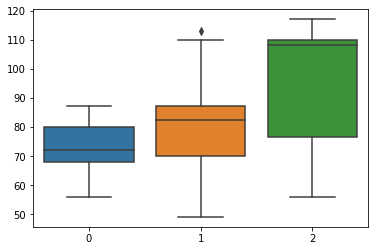

In [151]:
seaborn.boxplot(sweating)
plt.show()

### Двухфакторый дисперсионный анализ

In [170]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
data = pd.DataFrame({'headache':df['headache.1'], 'sweating':df['sweating.1'], 'HR':df['HR.1']})
model = ols('HR ~ C(sweating) + C(headache) + C(sweating):C(headache)', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(sweating),1558.271871,2.0,2.663359,0.087321
C(headache),0.008135,1.0,0.000028,0.995830
C(sweating):C(headache),1093.285155,2.0,1.868615,0.173080
Residual,8191.087662,28.0,NaN,NaN


Факторы имеют p-value больше 0.05, что говорит о том, что факторы потливости и головной боли не имеют значимых различий с зависимой метрической переменной HR.1